In [1]:
import argparse
from utils import prepare_save_dir
from STELLAR import STELLAR
import numpy as np
import torch
from datasets import CodexGraphDataset, load_tonsilbe_data, load_hubmap_data
import pandas as pd
import anndata
import scanpy as sc
import pickle

In [2]:
parser = argparse.ArgumentParser(description='STELLAR')
parser.add_argument('--dataset', default='TonsilBE', help='dataset setting')
parser.add_argument('--seed', type=int, default=1, metavar='S', help='random seed (default: 1)')
parser.add_argument('--name', type=str, default='STELLAR')
parser.add_argument('--epochs', type=int, default=50)
parser.add_argument('--lr', type=float, default=1e-3)
parser.add_argument('--wd', type=float, default=5e-2)
parser.add_argument('--input-dim', type=int, default=44)
parser.add_argument('--num-heads', type=int, default=13)
parser.add_argument('--num-seed-class', type=int, default=3)
parser.add_argument('--sample-rate', type=float, default=0.5)
parser.add_argument('-b', '--batch-size', default=1, type=int,
                metavar='N',
                help='mini-batch size')
parser.add_argument('--distance_thres', default=50, type=int)
parser.add_argument('--savedir', type=str, default='./')
args = parser.parse_args(args=[])
args.cuda = torch.cuda.is_available()
args.device = torch.device("cuda" if args.cuda else "cpu")

In [4]:
labeled_X, labeled_y, unlabeled_X, labeled_edges, unlabeled_edges = pickle.load(open( "./data/TonsilBE_processed_0.5.pkl", "rb" ) )
dataset = CodexGraphDataset(labeled_X, labeled_y, unlabeled_X, labeled_edges, unlabeled_edges)

In [5]:
stellar = STELLAR(args, dataset)
stellar.train()
_, results = stellar.pred()

Computing METIS partitioning...
Done!
Loss: 2.263967
Loss: 2.483893
Loss: 2.331461
Loss: 2.181312
Computing METIS partitioning...
Done!
Loss: 1.890186
Loss: 1.377910
Loss: 1.301184
Loss: 1.241226
Computing METIS partitioning...
Done!
Loss: 0.918220
Loss: 0.930239
Loss: 0.901790
Loss: 0.868459
Computing METIS partitioning...
Done!
Loss: 0.635314
Loss: 0.710405
Loss: 0.663552
Loss: 0.640316
Computing METIS partitioning...
Done!
Loss: 0.727137
Loss: 0.543268
Loss: 0.532255
Loss: 0.523025
Computing METIS partitioning...
Done!
Loss: 0.621828
Loss: 0.488112
Loss: 0.489587
Loss: 0.469170
Computing METIS partitioning...
Done!
Loss: 0.527081
Loss: 0.415021
Loss: 0.429300
Loss: 0.439968
Computing METIS partitioning...
Done!
Loss: 0.264450
Loss: 0.443365
Loss: 0.447377
Loss: 0.433115
Computing METIS partitioning...
Done!
Loss: 0.409178
Loss: 0.440245
Loss: 0.417791
Loss: 0.420518
Computing METIS partitioning...
Done!
Loss: 0.235315
Loss: 0.419137
Loss: 0.425886
Loss: 0.427316
Computing METIS part

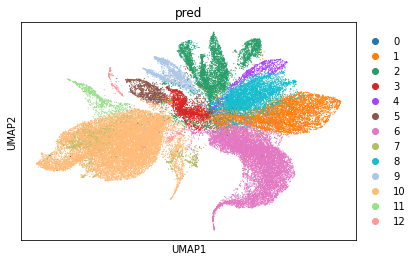

In [17]:
adata = anndata.AnnData(unlabeled_X)
adata.obs['pred'] = pd.Categorical(results)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color=['pred'], size=5)